In [1]:
%load_ext autoreload
%autoreload 2

#Setting Up and Importing the Necessary Packages/Libraries
##Package for reading in Bruker OPUS type files
from brukeropusreader import read_file
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pathlib
import numpy as np
import pandas as pd
#Local Functions
from hydrogenase_processing.cut_range import cut_range_subtraction, cut_range_subtraction_multiple_wv
from hydrogenase_processing.second_deriv import second_deriv, first_deriv
from hydrogenase_processing.anchor_points import interact
from hydrogenase_processing.anchor_points import get_peaks, get_start_end_anchorpoints, get_all_anchor_points
from hydrogenase_processing.vaporfit import atm_subtraction
from hydrogenase_processing.vaporfit import AtmFitParams
from scipy.signal import find_peaks, peak_widths
from hydrogenase_processing.anchor_points import get_peaks, get_start_end_anchorpoints, get_all_anchor_points, baseline_spline, get_peaks_absorbance, baseline_correction, get_peak_baseline_absorbance, plot_baseline_data
from hydrogenase_processing.peak_fit import gaussian, peak_fit, lorentzian


In [2]:
#Paths to Local Data
path_to_water_vapor_data = pathlib.Path("../../data/WV")
path_to_output_plots_= pathlib.Path("../../data/output_plots/")
path_to_pD8_data = pathlib.Path("../../data/pD8")

In [3]:
#Pulling in all pD8 sample data
pD8_raw_files = list(path_to_pD8_data.iterdir())
pD8_raw_files.sort()

#Initializing dict of raw spectra files from the file system
pD8_raw_data = dict()

#Populating the raw_test_data dict with all the read in raw opus files
##Using the first 3 characters, as they are the uniquely identifying portions of each of the file names
for i in pD8_raw_files:
    if not i.name.startswith('.DS_Store'):
        pD8_raw_data[f'pD8_{i.name[0:4]}'] = read_file(i)

print(pD8_raw_data.keys())

dict_keys(['pD8_134 ', 'pD8_135 ', 'pD8_136 ', 'pD8_137 ', 'pD8_138 ', 'pD8_139 ', 'pD8_143 ', 'pD8_144 ', 'pD8_145 ', 'pD8_146 ', 'pD8_147 ', 'pD8_148 ', 'pD8_149 ', 'pD8_150 ', 'pD8_151 ', 'pD8_152 ', 'pD8_153 ', 'pD8_155 ', 'pD8_156 ', 'pD8_157 ', 'pD8_158 '])


In [4]:
#Pulling in all wv data
water_vapor_files = list(path_to_water_vapor_data.iterdir())
water_vapor_files.sort()
#Initializing dict of wv_files from the file system
water_vapor_data = dict()

#Populating the water_vapor_data dict with all the read in wv opus files
#making sure names(keys) are distinct by subscripting
for i in (water_vapor_files):
    if not i.name.startswith('.DS_Store'):
        water_vapor_data[f'wv_{i.name[-6:len(i.name)]}_data'] = read_file(i)

print(water_vapor_data.keys())

dict_keys(['wv_cm-1.1_data'])


In [5]:
#Pulling in config file for pD8 samples
pd8_config_df = pd.read_excel("../../data/prospecpy_config.xlsx", sheet_name="hyd1_pD_8")
#Cutting names in file_name column to match the imported files
pd8_config_df["file_name"] = pd8_config_df["file_name"].apply(lambda file_name: f'pD8_{file_name[0:4]}') 


#Indexing the config dataframe by file_name for simultaneous parsing with the pD8_raw_data dict below
indexed_pD8_config_df = pd8_config_df.set_index('file_name')
print(indexed_pD8_config_df)

           range_start  range_end  Notes
file_name                               
pD8_134           2150       1850    NaN
pD8_135           2150       1850    NaN
pD8_136           2150       1850    NaN
pD8_137           2150       1850    NaN
pD8_138           2150       1850    NaN
pD8_139           2150       1850    NaN
pD8_143           2150       1850    NaN
pD8_144           2150       1850    NaN
pD8_145           2150       1850    NaN
pD8_146           2150       1850    NaN
pD8_147           2150       1850    NaN
pD8_148           2150       1850    NaN
pD8_149           2150       1850    NaN
pD8_150           2150       1850    NaN
pD8_151           2150       1850    NaN
pD8_152           2150       1850    NaN
pD8_153           2150       1850    NaN
pD8_155           2150       1850    NaN
pD8_156           2150       1850    NaN
pD8_157           2150       1850    NaN
pD8_158           2150       1850    NaN


In [6]:
#Initializing dict of post water vapor subtraction spectra
cut_range_sub_wv_data = dict()


for idx, row in indexed_pD8_config_df.iterrows():  
    print(idx)
    if idx in pD8_raw_data:
        raw_data_i = pD8_raw_data[idx]
        cut_range_sub_wv_data[f'{idx}_cut_range_sub_wv'] = cut_range_subtraction_multiple_wv(raw_data_i, water_vapor_data, row["range_start"], row["range_end"], SG_poly = 3, SG_points = 21)




pD8_134 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_135 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_136 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_137 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_138 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_139 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_143 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_144 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_145 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_146 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_147 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_148 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_149 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_150 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_151 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_152 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_153 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_155 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_156 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_157 
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD8_158 
wv_cm-1.1_data
2150.0 1850.0
959 1115


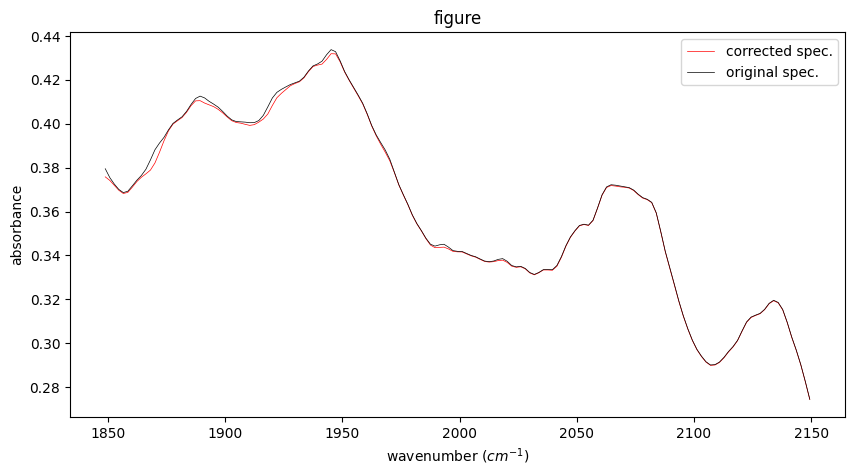

In [7]:
sample_raw = cut_range_sub_wv_data["pD8_139 _cut_range_sub_wv"]
sample_raw[0][0].plot()

In [8]:
#Creating Empty Dict for second derivative of cut and subtracted data
second_deriv_pD8_data = dict()

#Filling it with second derivatives of all the data
for i in cut_range_sub_wv_data:
    cut_range_sub_wv_data_i = cut_range_sub_wv_data[i]
    print(i)
    second_deriv_pD8_data[f'{i}_second_deriv'] = second_deriv(cut_range_sub_wv_data_i, show_plots=False)

pD8_134 _cut_range_sub_wv
pD8_135 _cut_range_sub_wv
pD8_136 _cut_range_sub_wv
pD8_137 _cut_range_sub_wv
pD8_138 _cut_range_sub_wv
pD8_139 _cut_range_sub_wv
pD8_143 _cut_range_sub_wv
pD8_144 _cut_range_sub_wv
pD8_145 _cut_range_sub_wv
pD8_146 _cut_range_sub_wv
pD8_147 _cut_range_sub_wv
pD8_148 _cut_range_sub_wv
pD8_149 _cut_range_sub_wv
pD8_150 _cut_range_sub_wv
pD8_151 _cut_range_sub_wv
pD8_152 _cut_range_sub_wv
pD8_153 _cut_range_sub_wv
pD8_155 _cut_range_sub_wv
pD8_156 _cut_range_sub_wv
pD8_157 _cut_range_sub_wv
pD8_158 _cut_range_sub_wv


In [9]:
sample_second_deriv = second_deriv_pD8_data["pD8_139 _cut_range_sub_wv_second_deriv"]
#print(sample_second_deriv)

In [50]:
#anchor_point_dict, deriv_x_peak_val, anchor_points_raw_data, y_corr_abs
anchor_point_dict, deriv_x_peak_val, anchor_points_raw_data, y_corr_abs = interact(sample_second_deriv, sample_raw, 0.4,   1.2)

interactive(children=(BoundedFloatText(value=0.4, description='Threshold for peak selection(0 to 1 in 0.01 steps):', max=1.0, step=0.01), BoundedFloatText(value=1.2, description='adj for anchor point selection(0 to 5 in 0.01 steps):', max=5.0, step=0.01), Output()), _dom_classes=('widget-interact',))


interactive(children=(BoundedFloatText(value=0.4, description='Threshold for peak selection(0 to 1 in 0.01 ste…

In [51]:
peaks_index, deriv_x_peak_val, d2ydx2_peak_val = get_peaks(sample_second_deriv, threshold = 0.4)
wv_startIdx, wv_endIdx = get_start_end_anchorpoints(peaks_index[0], sample_second_deriv)
y_corr_abs = sample_raw[0][0].sub_spectrum
anchor_points_raw_data = sample_raw[0][0].wavenb


In [52]:
anchor_point_dict = {} #key is the adjustment factor and value is the list of anchor points using that adjustemnt factor

anchor_point_dict[2] = get_all_anchor_points(wv_startIdx, wv_endIdx, deriv_x_peak_val, anchor_points_raw_data, y_corr_abs, 1.2)

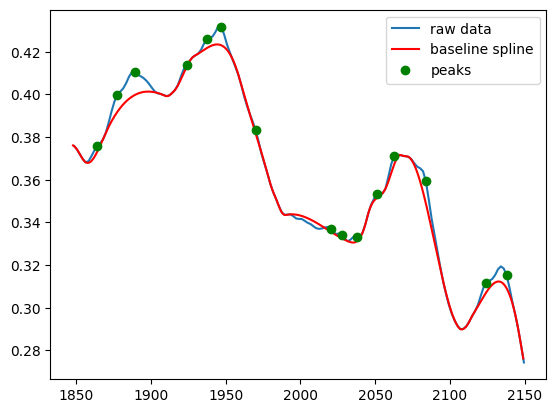

In [53]:
anchor_points = anchor_point_dict.get(2)
anchor_points_df = anchor_points[0]  # Extracting the DataFrame which has the necessary columns because update function takes a data frame of anchor points containing  wavenumber and absorbances
baseline_curve = baseline_spline(anchor_points_df, smooth=10**-9)
peak_wv, peak_abs = get_peaks_absorbance(deriv_x_peak_val, anchor_points_raw_data, y_corr_abs)

plt.plot(anchor_points_raw_data, y_corr_abs, label = 'raw data')
plt.plot(baseline_curve['wavenumber'], baseline_curve['absorbance'], 'r-', label = 'baseline spline')
plt.plot(peak_wv, peak_abs, 'go', label = 'peaks')
plt.legend()


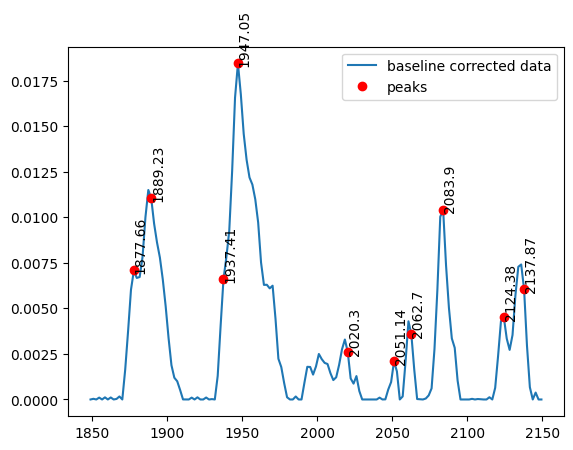

In [44]:
baseline_corrected_abs = baseline_correction(baseline_curve, anchor_points_raw_data, y_corr_abs)
#print(baseline_corrected_abs)
peak_baseline_abs = get_peak_baseline_absorbance(anchor_points_raw_data, baseline_corrected_abs, peak_wv)
plot_baseline_data(anchor_points_raw_data, baseline_corrected_abs, peak_wv, peak_baseline_abs)

In [45]:
#Half height width
indices = np.where(np.isin(anchor_points_raw_data,peak_wv))[0]
peak_width,height, left_ips, right_ips = peak_widths(baseline_corrected_abs, indices, rel_height=0.5) 
print(indices)
print(peak_width)

[  6  13  34  45  51  67 105 110 135 141]
[ 0.          2.12453765  4.17173262  0.          2.24270823  0.
 10.2525922   0.          0.          0.69401012]


/tmp/ipykernel_19696/2552361210.py:3: PeakPropertyWarning: some peaks have a prominence of 0
  peak_width,height, left_ips, right_ips = peak_widths(baseline_corrected_abs, indices, rel_height=0.5)
/tmp/ipykernel_19696/2552361210.py:3: PeakPropertyWarning: some peaks have a width of 0
  peak_width,height, left_ips, right_ips = peak_widths(baseline_corrected_abs, indices, rel_height=0.5)


In [46]:
def gaussian_fit(x, *params):

    y = np.zeros_like(x)

    for i in range(0, len(params), 3):
        amplitude = params[i]
        center = params[i+1]
        sigma = params[i+2]
        y += amplitude*(1/(sigma* np.sqrt(2*np.pi)))*np.exp((-1/2)*((x - center)/ sigma)**2) 
    return y

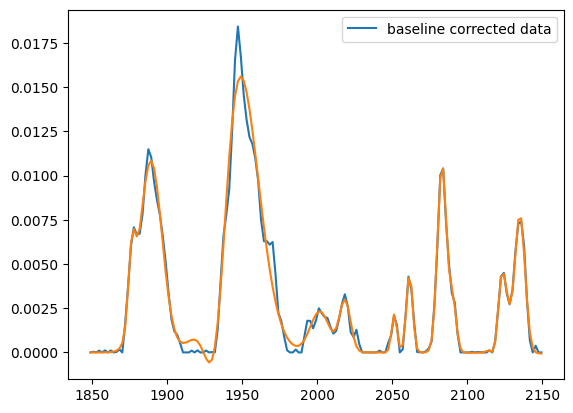

In [47]:
from scipy.optimize import curve_fit
#2091.614748864712, 2080.0497375656423,
guess = [0.3, 1878, 2, 0.3, 1889, 2, 0.3, 1937, 2,  0.24, 1947, 2, 0.14, 2020, 2, 0.14, 2051, 2, 0.14, 2064, 2, 0.014, 2084, 2,0.014, 2124, 2,0.014, 2138, 2, 0.014, 2095, 2, 0.014, 2113, 2,0.014, 2122, 2,0.014, 2138, 2]
params, covariance = curve_fit(gaussian_fit, anchor_points_raw_data, baseline_corrected_abs, guess)
plt.plot(anchor_points_raw_data,baseline_corrected_abs, label = 'baseline corrected data')
plt.plot(anchor_points_raw_data, gaussian_fit(anchor_points_raw_data, *params))
plt.legend()

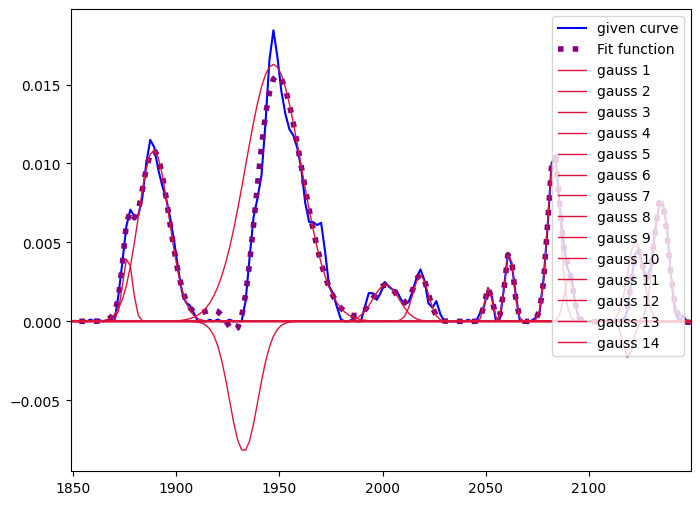

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(anchor_points_raw_data,baseline_corrected_abs, 'b', label="given curve")

ax.plot(anchor_points_raw_data, gaussian_fit(anchor_points_raw_data, *params), ls=':', label="Fit function", linewidth=4, color='purple')
for i, (a, c, s )in enumerate( params.reshape(-1, 3)):
    ax.plot(anchor_points_raw_data, gaussian_fit(anchor_points_raw_data, a, c, s), ls='-', label=f"gauss {i+1}", linewidth=1, color='crimson')
ax.legend()
ax.autoscale(axis='x', tight=True)
plt.show()

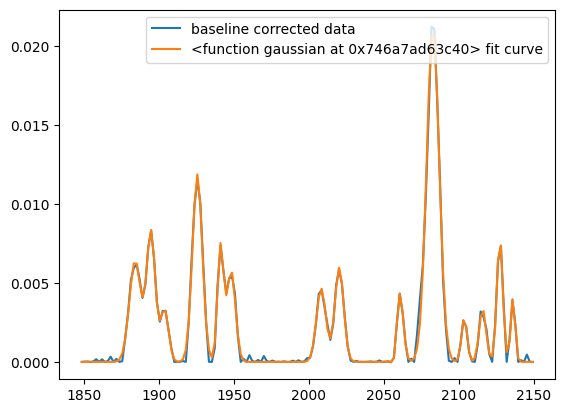

In [88]:
guess = guess = [0.3, 1885, 2, 0.3, 1895, 2, 0.3, 1904, 2,  0.24, 1925, 2, 0.14, 1941, 2, 0.14, 1950, 2, 0.014, 2008, 2, 0.014, 2022, 2, 0.014, 2080.05, 2, 0.24, 2050.6, 2, 0.24, 2020, 2, 0.24, 2105, 2, 0.014, 2116, 2, 0.014, 2128, 2, 0.014, 2138, 2]
params = peak_fit(gaussian,guess,  anchor_points_raw_data, baseline_corrected_abs)